**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [1]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Data Preprocessing

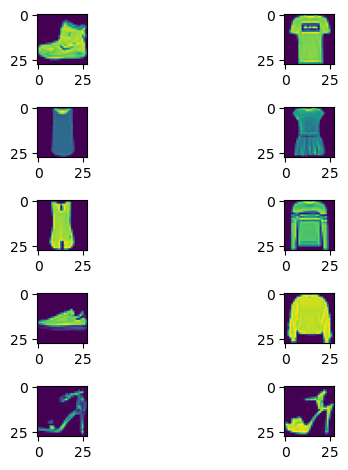

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
plt.tight_layout()
plt.show()

# Build CNN Model

In [3]:
from keras.optimizers import RMSprop, SGD
x_train /= 255
x_test /=255
model =Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])  #Initialize model here

'''
Define batch size of 64 , 
No of classes (interpret from data)
Train for 5 epochs

'''
# Define batch size, number of classes, and epochs
batch_size = 64
num_classes = 10
epochs = 5

def build_model(optimizer): 
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model  
    '''
    Define a sequential model with categorical cross entropy as loss function consisting
    2 convolution and 2 pooling layers with relu as activation function followed by
    droput -> flatten -> dense -> dropout -> dense

    Convolution layer - (kernel size = (3*3))
    Pooling layer - (pool size = (2*2))

   '''



   

 #**** call build model with RMSprop and SGDOptimizer Optimizer ****
optimizer = RMSprop()
model = build_model(optimizer)
plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test)) 

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.5812 - accuracy: 0.7887 - val_loss: 0.4127 - val_accuracy: 0.8476
Epoch 2/5
938/938 [==============================] - 9s 9ms/step - loss: 0.3895 - accuracy: 0.8598 - val_loss: 0.3755 - val_accuracy: 0.8589
Epoch 3/5
938/938 [==============================] - 9s 9ms/step - loss: 0.3416 - accuracy: 0.8769 - val_loss: 0.3129 - val_accuracy: 0.8900
Epoch 4/5
938/938 [==============================] - 9s 9ms/step - loss: 0.3172 - accuracy: 0.8854 - val_loss: 0.2924 - val_accuracy: 0.8950
Epoch 5/5
938/938 [==============================] - 9s 9ms/step - loss: 0.3013 - accuracy: 0.8910 - val_loss: 0.3177 - val_accuracy: 0.8855


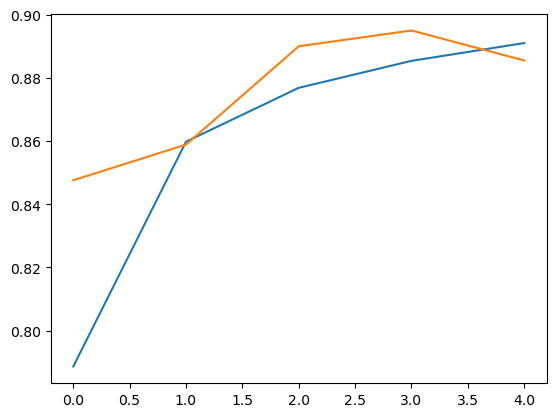

In [4]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

# Predict Image

/var/folders/xr/3mqjmrq562xfx5pt_g5skdl40000gn/T/ipykernel_33801/625701412.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, "mnistf.h5", save_format="h5")


1/1 [==============================] - 0s 43ms/step
Predicted label: Shirt


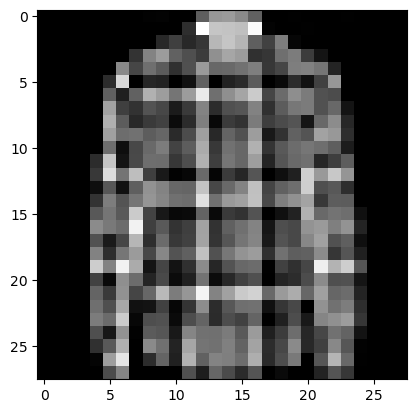

In [5]:
keras.models.save_model(model, "mnistf.h5", save_format="h5")

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
from keras.models import load_model
def predict_image(model, img):

  '''
  Reshape the image into (1,28,28)
  predict the answer and print it

  '''
  #**** Insert code here ****
  # Reshaping the image to (1, 28, 28, 1) to match model input
  img = img.reshape(1, 28, 28, 1)

  # Predict the class (probabilities for each class)
  prediction = model.predict(img)

  # Get the predicted class by finding the index with the highest probability
  predicted_label = np.argmax(prediction)

  # Print the predicted label using the mapping
  print("Predicted label:", labels[predicted_label])

m = load_model('mnistf.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
